<a href="https://colab.research.google.com/github/ejguo/quasifuchsian/blob/main/quasifuchsian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matrix A: [[(1.4999999999999998-2.220446049250313e-16j), (-0.5020714735985432+0.5633716459349587j)], [(-1.1020714735985433-1.2366283540650418j), (1.5+2.220446049250313e-16j)]]
Matrix B: [[(1.5-0.5j), (1.5+0.5j)], [(1.5+0.5j), (1.5+1.5j)]]
Commutator: [[(-2.0000000000000004+3.0000000000000004j), (1-3.000000000000001j)], [(-0.9999999999999982+3.000000000000001j), (-2.220446049250313e-15-3j)]] (0.9999999962035341-2.339487517044603e-08j) (1.0000000037964656+2.3394875903193225e-08j)
Commutator: [[(-2.0000000000000004+3.0000000000000004j), (1-3.000000000000001j)], [(-0.9999999999999982+3.000000000000001j), (-2.220446049250313e-15-3j)]] (0.9999999962035341-2.339487517044603e-08j) (1.0000000037964656+2.3394875903193225e-08j)


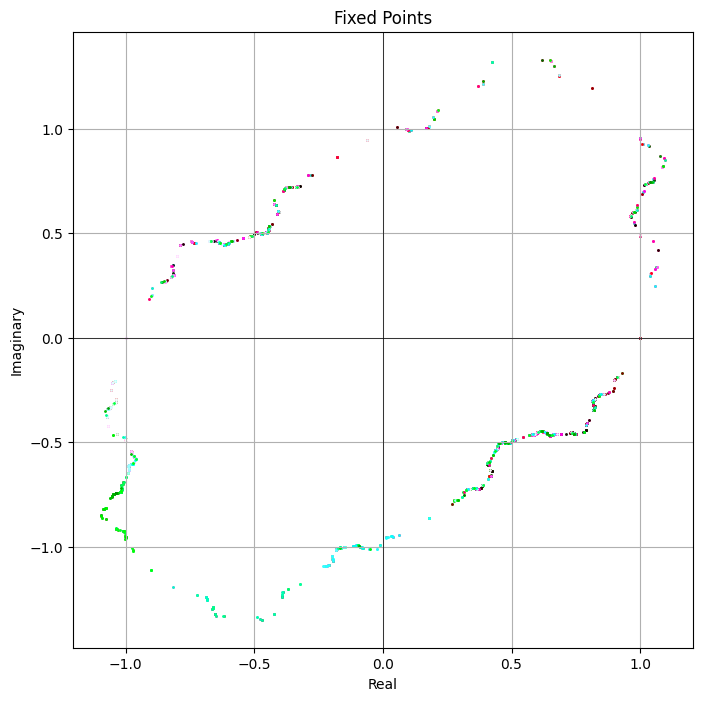

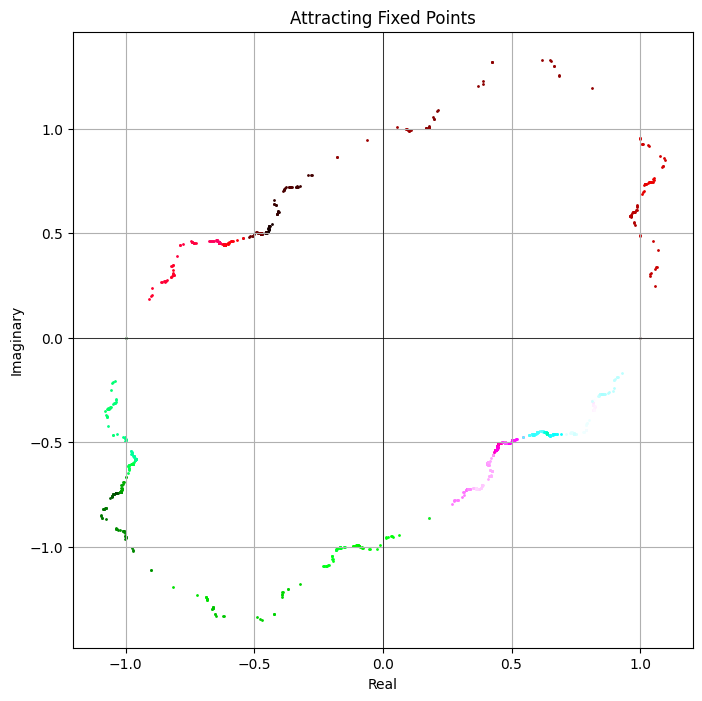

In [ ]:
import numpy as np
import cmath
import matplotlib.pyplot as plt


def grandma(ta, tb, posroot=False, opt=0, tab=None):
    if tab is None:
        opt = opt % 2

    if opt < 2:  # Calculate the trace Tab from the grandfather identity
        p = -ta * tb
        q = ta**2 + tb**2

        if posroot:
            tab = (-p + cmath.sqrt(p**2 - 4 * q)) / 2
        else:
            tab = (-p - cmath.sqrt(p**2 - 4 * q)) / 2

        z0 = ((tab - 2) * tb) / (tb * tab - 2 * ta + 2j * tab)

        if opt == 0:  # Grandma's original recipe
            ab = [
                [tab / 2, (tab - 2) / (2 * z0)],
                [(tab + 2) * z0 / 2, tab / 2]
            ]

            b = [
                [(tb - 2j) / 2, tb / 2],
                [tb / 2, (tb + 2j) / 2]
            ]

            # Calculate matrix multiplication a = ab * b^-1
            det_b = b[0][0] * b[1][1] - b[0][1] * b[1][0]

            b_inv = [
                [b[1][1] / det_b, -b[0][1] / det_b],
                [-b[1][0] / det_b, b[0][0] / det_b]
            ]

            a = [
                [ab[0][0] * b_inv[0][0] + ab[0][1] * b_inv[1][0], ab[0][0] * b_inv[0][1] + ab[0][1] * b_inv[1][1]],
                [ab[1][0] * b_inv[0][0] + ab[1][1] * b_inv[1][0], ab[1][0] * b_inv[0][1] + ab[1][1] * b_inv[1][1]]
            ]

            return a, b
    return None, None

# Specify traces
ta = 3
tb = 3 + 1j
a, b = grandma(ta, tb)
print("Matrix A:", a)
print("Matrix B:", b)


'''
# Define the variables
u = 5 + 2j
v = 1 - 3j
w = (u * v + cmath.sqrt(u**2 * v**2 - 4*(u**2 + v**2))) / 2

# Jorgensen parameters
a = [[u - v / w, v / w**2], [u, v / w]]
b = [[v - u / w, -v / w**2], [-v, u / w]]

# Button parameters
a = [[(1 + u**2) / v, u], [u, v]]
b = [[(1 + v**2) / u, -v], [-v, u]] '''


# Round entries of a and b
# a = [[round(entry.real, 5) + round(entry.imag, 5) * 1j for entry in row] for row in a]
# b = [[round(entry.real, 5) + round(entry.imag, 5) * 1j for entry in row] for row in b]

# Define the inverses of a and b
def inverse(matrix):
    det = matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]
    return [[matrix[1][1] / det, -matrix[0][1] / det], [-matrix[1][0] / det, matrix[0][0] / det]]

a_inv = inverse(a)
b_inv = inverse(b)

# Define the DFS function
def generate_words_dfs(k):
    elements = [('a', 'a_inv'), ('b', 'b_inv')]
    words = set()

    def dfs(current_word, last_gen):
        if len(current_word.split()) <= k:
            words.add(current_word.strip())
            for gen, inv in elements:
                if last_gen != inv:
                    dfs(current_word + ' ' + gen, gen)
                if last_gen != gen:
                    dfs(current_word + ' ' + inv, inv)

    dfs('', None)
    return words

# Compute the matrix product, check the trace, and find the fixed points
def compute_matrix_products_and_fixed_points(words):
    word_to_matrix = {
        'a': a,
        'a_inv': a_inv,
        'b': b,
        'b_inv': b_inv
    }

    fixed_points = []
    attracting_fixed_points = []
    for word in sorted(words):
        if word == '':
            product = [[1, 0], [0, 1]]  # Identity matrix for empty word
        else:
            matrices = [word_to_matrix[w] for w in word.split()]
            product = [[1, 0], [0, 1]]
            for matrix in matrices:
                product = [[product[0][0] * matrix[0][0] + product[0][1] * matrix[1][0],
                            product[0][0] * matrix[0][1] + product[0][1] * matrix[1][1]],
                           [product[1][0] * matrix[0][0] + product[1][1] * matrix[1][0],
                            product[1][0] * matrix[0][1] + product[1][1] * matrix[1][1]]]

        # Round the matrix entries
        # product = [[round(entry.real, 5) + round(entry.imag, 5) * 1j for entry in row] for row in product]

        # Check the trace
        trace = product[0][0] + product[1][1]
        if abs(trace.imag) < 0.00001 and abs(trace.real) <= 1.99999:
            print(f"Error: Quit")
            print(word, product, trace)

        # if (trace.imag)**2 + (trace.real)**2 < 3.99999:
            # print(f"Error: trace <= 2 for word '{word}'")

        # Extract the matrix elements
        a_val = product[0][0]
        b_val = product[0][1]
        c_val = product[1][0]
        d_val = product[1][1]

        # Compute the discriminant for the fixed point formula
        discriminant = (d_val - a_val)**2 + 4 * b_val * c_val

        # Check for computation errors
        # if discriminant.real < 0:
          # print(word,product, discriminant, a_val, b_val, c_val, d_val)

        # Compute the fixed points
        if c_val != 0:  # To avoid division by zero
            fixed_point_1 = (a_val - d_val + cmath.sqrt(discriminant)) / (2 * c_val)
            fixed_point_2 = (a_val - d_val - cmath.sqrt(discriminant)) / (2 * c_val)
            fixed_points.append(fixed_point_1)
            fixed_points.append(fixed_point_2)
            # Derivative of the transformation at the fixed points
            def derivative(z):
              return (a_val * d_val - b_val * c_val) / (c_val * z + d_val)**2

            # Determine which is the attracting fixed point
            if abs(derivative(fixed_point_1)) < 1:
                attracting_fixed_points.append(fixed_point_1)
            else:
                attracting_fixed_points.append(fixed_point_2)

        # if word == 'a b a_inv b_inv':
          # print(f"Commutator:", product, fixed_point_1, fixed_point_2)

    return fixed_points, attracting_fixed_points

# Usage
k = 6
all_words = generate_words_dfs(k)
fixed_points = compute_matrix_products_and_fixed_points(all_words)[0]
attracting_fixed_points = compute_matrix_products_and_fixed_points(all_words)[1]

# Evaluate fixed points to numerical values for plotting
fixed_points_evaluated = [(point.real, point.imag) for point in fixed_points]
attracting_fixed_points_evaluated = [(point.real, point.imag) for point in attracting_fixed_points]

# Colors
def generate_colors(num_points):
    colors = []
    r, g, b = 0, 0, 0
    for i in range(num_points):
        if i % 1 == 0:  # Change color every n points
            if r < 255 and g == 0 and b == 0:
                r = min(255, r + 1)
            elif r == 255 and b < 255 and g == 0:
                b = min(255, b + 1)
            elif r == 255 and b == 255 and g < 255:
                g = min(255, g + 1)
            elif b == 255 and r > 0:
                r = max(0, r - 1)
            elif r == 0 and g == 255 and b > 0:
                b = max(0, b - 1)
            elif g > 0 and r == 0 and b == 0:
                g = max(0, g - 1)
        colors.append((r / 255, g / 255, b / 255))  # Normalize to [0, 1] for matplotlib
    return colors

# Get the number of points in each list
num_points_fixed = len(fixed_points_evaluated)
num_points_attracting = len(attracting_fixed_points_evaluated)

# Generate colors for each list
colors_fixed = generate_colors(num_points_fixed)
colors_attracting = generate_colors(num_points_attracting)

# Plotting the first set: fixed points
plt.figure(figsize=(8, 8))
for i, (x, y) in enumerate(fixed_points_evaluated):
    plt.scatter(x, y, color=colors_fixed[i], s=1)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Fixed Points')
plt.grid(True)
plt.show()

# Plotting the second set: attracting fixed points
plt.figure(figsize=(8, 8))
for i, (x, y) in enumerate(attracting_fixed_points_evaluated):
    plt.scatter(x, y, color=colors_attracting[i], s=1)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Attracting Fixed Points')
plt.grid(True)
plt.show()


